<a href="https://colab.research.google.com/github/conste11ations/ml3253-2021/blob/main/Term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
 
drive.mount('/content/drive/')
 
path = '/content/drive/MyDrive/Colab Notebooks/ML assignment/Major_Crime_Indicators.csv'
data = pd.read_csv(path)
data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


X             Y  Index_  ...       Long        Lat ObjectId
0 -8.859749e+06  5.423033e+06   10182  ... -79.588477  43.725321        1
1 -8.861050e+06  5.426864e+06   10298  ... -79.600166  43.750187        2
2 -8.861412e+06  5.422084e+06   10300  ... -79.603420  43.719158        3
3 -8.859955e+06  5.424372e+06   10345  ... -79.590332  43.734013        4
4 -8.859955e+06  5.424372e+06   10346  ... -79.590332  43.734013        5

[5 rows x 29 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242879 entries, 0 to 242878
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    242879 non-null  float64
 1   Y                    242879 non-null  float64
 2   Index_               242879 non-null  int64  
 3   event_unique_id      242879 non-null  object 
 4   Division             242879 non-null  object 
 5   occurrencedate       242879 non-null  object 
 6   reporteddate         242879 non-null  object 
 7   premises_type        242879 non-null  object 
 8   ucr_code             242879 non-null  int64  
 9   ucr_ext              242879 non-null  int64  
 10  offence              242879 non-null  object 
 11  reportedyear         242879 non-null  int64  
 12  reportedmonth        242879 non-null  object 
 13  reportedday          242879 non-null  int64  
 14  reporteddayofyear    242879 non-null  int64  
 15  reporteddayofweek

In [ ]:
 # drop X and Y
 # obtain only unique event_unique_id
 # fill in missing values for occurrence columns
 # drop occurrencedate and reporteddate
 # drop Neighbourhood because same as Hood_ID
 # MCI is just a classification of crime

# Data Cleaning

In [3]:
unique_data = data.drop(['Index_'], axis=1).drop_duplicates(subset=['event_unique_id'])
unique_data = unique_data.drop(unique_data[unique_data['ucr_code'] == 1475].index)
unique_data = unique_data[(unique_data['Division']!='NSA') & (unique_data['Hood_ID']!='NSA')]

from sklearn.preprocessing import LabelEncoder

day_of_week = {
  'Monday': 0,
  'Tuesday': 1,
  'Wednesday': 2,
  'Thursday': 3,
  'Friday': 4,
  'Saturday': 5,
  'Sunday': 6
}

unique_data['occurrencedayofweek_numeric'] = unique_data['occurrencedayofweek'].apply(lambda m: day_of_week.get(m))

month_name = {
  'January': 1,
  'February': 2,
  'March': 3,
  'April': 4,
  'May': 5,
  'June': 6,
  'July': 7,
  'August': 8,
  'September': 9,
  'October': 10,
  'November': 11,
  'December': 12
}

unique_data['occurrencemonth_numeric'] = unique_data['occurrencemonth'].apply(lambda m: month_name.get(m))

In [4]:
missing_year = unique_data.loc[unique_data['occurrenceyear'].isnull()]
missing_month = unique_data.loc[unique_data['occurrencemonth_numeric'].isnull()]
missing_day = unique_data.loc[unique_data['occurrenceday'].isnull()]
missing_doy = unique_data.loc[unique_data['occurrencedayofyear'].isnull()]
missing_dow = unique_data.loc[unique_data['occurrencedayofweek_numeric'].isnull()]
print(missing_year.equals(missing_month)) #need to convert to string
print(missing_year.equals(missing_day))
print(missing_year.equals(missing_doy))
print(missing_year.equals(missing_dow)) # convert to string

True
True
True
True


In [5]:
from datetime import datetime
f = '%Y/%m/%d %H:%M:%S+%f'
missing_year = unique_data.loc[unique_data['occurrenceyear'].isnull()]
for row in missing_year.itertuples():
  occurrence_date = datetime.strptime(row.occurrencedate, f)
  values = {
    'occurrenceyear': int(occurrence_date.strftime('%Y')),
    'occurrencemonth_numeric': int(occurrence_date.strftime('%m')), 
    'occurrenceday': int(occurrence_date.strftime('%d')), 
    'occurrencedayofyear': occurrence_date.timetuple().tm_yday, 
    'occurrencedayofweek_numeric': occurrence_date.weekday()
  }
  unique_data.fillna(value=values, limit=1, inplace=True)

 # to have testing to make sure we didn't mess up data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(unique_data['MCI'])
le.classes_
unique_data['MCI_number'] = le.transform(unique_data['MCI'])
unique_data['MCI_number'].value_counts()

# factorize premises_type
labels, uniques = pd.factorize(unique_data['premises_type'])
print("Unique Values : \n", uniques)
unique_data['premises_type_numeric'] = labels

Unique Values : 
 Index(['House', 'Outside', 'Apartment', 'Commercial', 'Other', 'Educational',
       'Transit'],
      dtype='object')


In [6]:
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210349 entries, 0 to 241737
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   X                            210349 non-null  float64
 1   Y                            210349 non-null  float64
 2   event_unique_id              210349 non-null  object 
 3   Division                     210349 non-null  object 
 4   occurrencedate               210349 non-null  object 
 5   reporteddate                 210349 non-null  object 
 6   premises_type                210349 non-null  object 
 7   ucr_code                     210349 non-null  int64  
 8   ucr_ext                      210349 non-null  int64  
 9   offence                      210349 non-null  object 
 10  reportedyear                 210349 non-null  int64  
 11  reportedmonth                210349 non-null  object 
 12  reportedday                  210349 non-null  int64  
 13 


# Data Exploration


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


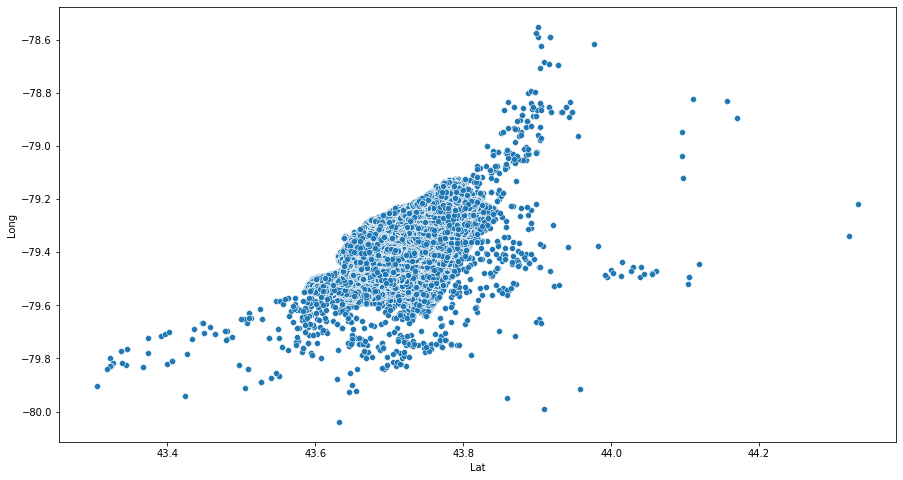

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,8))
sns.scatterplot(data['Lat'], data['Long'])

In [ ]:
import folium
from folium.plugins import HeatMap

# create the map
temp = unique_data.loc[unique_data['occurrenceyear'] == 2020.00].loc[unique_data['occurrencemonth'] == 'March'].loc[unique_data['MCI'] == 'Assault']

#Make the list of Lat an Lng
lat = temp['Lat'].tolist()
lng = temp['Long'].tolist()

#Create the Map
map = folium.Map(
    location=[43.655321, -79.388477],
    tiles='cartodbdark_matter',
    zoom_start=12
)
HeatMap(list(zip(lat, lng))).add_to(map)
map

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(unique_data, test_size=0.2, random_state=42)

# Objective 2: Predict MCI (type of crime) based on various factors

Decision Tree Classifier Parameter Considerations

#### HYPERPARAMETER TUNING - most of these we use the defaults but they are explicitly stated for clarity
https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
#### criterion='gini'
According to the paper “Theoretical comparison between the Gini Index and Information Gain criteria” [3], 
the frequency of agreement/disagreement of the Gini Index and the Information Gain was only 2% of all cases, 
so for all intents and purposes you can pretty much use either, but the only difference is entropy might be a little slower to compute 
because it requires you to compute a logarithmic function
#### splitter='best'
selecting 'random' gave a lower accuracy score and we don't need the computational advantages of not having to compute optimal split
'random' will have the advantage of being less prone to overfitting
#### max_depth=None
Again our dataset is small enough that we don't need optimize compute power so we will
let the algorithm expand nodes until all leaves are pure or until all leaves contain less than min_samples_split samples
In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits and it captures more information 
about the data and this is one of the root causes of overfitting in decision trees because your model will fit perfectly for the training data and will not be able to 
generalize well on test set. So, if your model is overfitting, reducing the number for max_depth is one way to combat overfitting. Right now 20 gives same results as None
#### min_samples_split = 2
minimum number of samples required to split an internal node
#### ccp_alpha = 0.0
Complexity parameter used for Minimal Cost-Complexity Pruning. You would prune to avoid over-fitting
The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed (default = 0.0)
The pruning process stops when the pruned tree’s complexity parameter alpha is greater than the ccp_alpha parameter
unfortunately when applying pruning the accuracy_score dropped by about 5
random_state to be a number to get deterministic behaviour
class weights
as the decision tree does not perform well in an imbalanced dataset
#### we should apply custom weights (TODO) - 1430 ucr_code right now is about 30% of the dataset
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Stratified Shuffle Split with Decision Tree Classifier

In [ ]:
# using regression to get predicted data

def stratified_shuffle_split():

  from sklearn.model_selection import StratifiedShuffleSplit
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import f1_score
  from sklearn.metrics import accuracy_score
  from sklearn.model_selection import GridSearchCV

  columns = ['Lat', 
              'Long', 
              'occurrencedayofyear', 
              'occurrencedayofweek_numeric', 
              'occurrencehour', 
              'Hood_ID', 
              'premises_type_numeric']

  X = unique_data[columns]
  y = unique_data['ucr_code']
  sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)


  tree_params = {'criterion':['gini','entropy'],'max_depth':[8,12,None], 'splitter':['best', 'random'], 'ccp_alpha':[0,1], 'random_state': [42] }
  # If you wanted to run GridSearchCV
  tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=3)
  # tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=12, min_samples_split=2, ccp_alpha=0, random_state=42)

  for train_index, test_index in sss.split(X, y):
      X_stratified_train, X_stratified_test = X.iloc[train_index], X.iloc[test_index]
      y_stratified_train, y_stratified_test = y.iloc[train_index], y.iloc[test_index]

      tree.fit(X_stratified_train, y_stratified_train)
      print(tree.best_params_)
      pred = tree.predict(X_stratified_test)
      print("Accuracy Score: ", accuracy_score(y_stratified_test, pred))
      print("F1 Score: ", f1_score(y_stratified_test, pred, average="weighted"))


In [ ]:
stratified_shuffle_split()

{'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 8, 'random_state': 42, 'splitter': 'best'}
Accuracy Score:  0.4768243403850725
F1 Score:  0.4080072226095692
{'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 8, 'random_state': 42, 'splitter': 'best'}
Accuracy Score:  0.47406703113857857
F1 Score:  0.4056353097754215
{'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 8, 'random_state': 42, 'splitter': 'best'}
Accuracy Score:  0.47703826955074874
F1 Score:  0.412642240332018


KeyboardInterrupt: ignored

#### Ensemble

Non-Stratified Shuffle Split with Ensemble Learning 

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

columns = ['Lat', 
          'Long', 
          'occurrencedayofyear', 
          'occurrencedayofweek_numeric', 
          'occurrencehour', 
          'Hood_ID', 
          'premises_type_numeric']

tree_params = {'criterion':['gini','entropy'],'max_depth':[8,12,None], 'splitter':['best', 'random'], 'ccp_alpha':[0,1], 'random_state': [42] }
# If you wanted to run GridSearchCV
#tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=8, ccp_alpha=0, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

log_clf = LogisticRegression()
sgd_clf = SGDClassifier(random_state=42, loss='modified_huber')
rnd_clf = RandomForestClassifier(criterion='gini', max_depth=8, ccp_alpha=0, random_state=42)
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[('rf', rnd_clf), ('gdc', sgd_clf), ('svc', svm_clf)],
    voting='hard')

import numpy as np
from sklearn.model_selection import train_test_split
train_data = unique_data
train_set, test_set = train_test_split(unique_data, test_size=0.2, random_state=42)

X_train = train_set[columns].copy()
y_train = train_set['ucr_code'].copy()
y_train_mci = train_set['MCI_number'].copy()

X_test = test_set[columns].copy()
y_test = test_set['ucr_code'].copy()
y_test_mci = train_set['MCI_number'].copy()

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

voting_clf.fit(X_train, y_train)


In [22]:
y_test_predict = voting_clf.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_test_predict))
print("F1 Score: ", f1_score(y_test, y_test_predict, average="weighted"))

Accuracy Score:  0.41476586641312096
F1 Score:  0.3233205516718483
